In [25]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize_scalar, minimize

# Define the ODEs
def odes(t, x, T):
    a, b, c = x
    
    k1 = 4000 * np.exp(-2500 / T)
    k2 = 620000 * np.exp(-5000 / T)
    
    dadt = -k1 * a
    dbdt = k1 * a - k2 * b
    dcdt = k2 * b
    
    return [dadt, dbdt, dcdt]

# Objective function for optimization
def objective(T):
    t_span = [0, 1]  # Time span from 0 to 1
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    x0 = [1, 0, 0]  # Initial concentrations of A, B, and C
    
    sol = solve_ivp(odes, t_span, x0, t_eval=t_eval, args=(T,))
    
    # The objective is to maximize the concentration of B at tf = 1
    return -sol.y[1][-1]  

# Optimization
result = minimize_scalar(objective, bounds=(298, 398), method='bounded')
optimal_temperature = result.x

print(f"Optimal temperature: {optimal_temperature} K")


Optimal temperature: 333.0791254142595 K


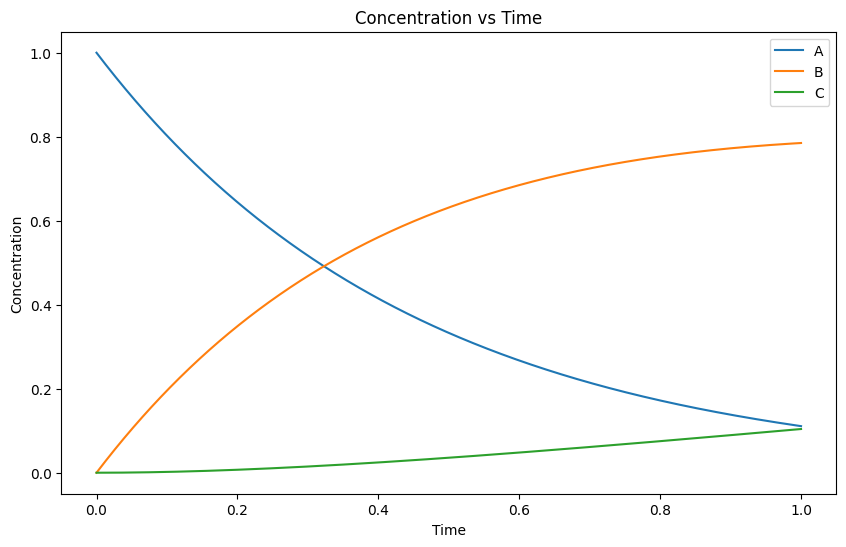

In [8]:
import matplotlib.pyplot as plt

# Function to solve ODEs for a given temperature
def solve_odes(T):
    t_span = [0, 1]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    x0 = [1, 0, 0]
    
    sol = solve_ivp(odes, t_span, x0, t_eval=t_eval, args=(T,))
    return sol.t, sol.y

# Optimal temperature from the optimization
optimal_temperature = result.x

# Solve ODEs for the optimal temperature
t, y = solve_odes(optimal_temperature)

# Plot the concentrations over time
plt.figure(figsize=(10, 6))
plt.plot(t, y[0], label='A')
plt.plot(t, y[1], label='B')
plt.plot(t, y[2], label='C')
plt.title('Concentration vs Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


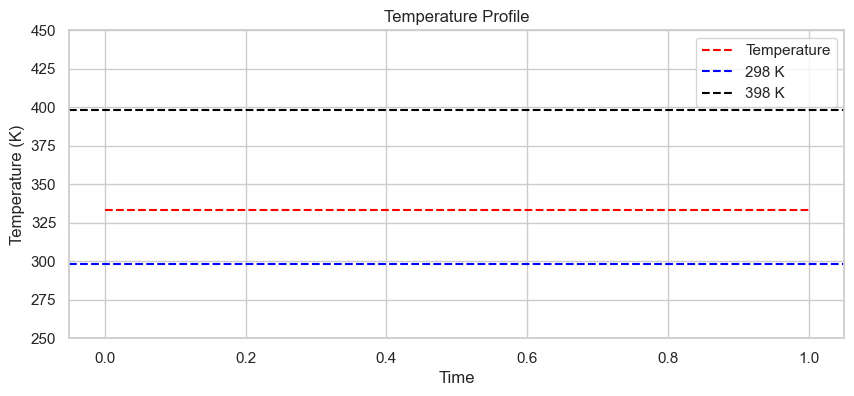

In [20]:
# Function to get the temperature profile
def temperature_profile(T):
    t, y = solve_odes(T)
    return t, [T] * len(t)

# Plot temperature profile
t_temp, temp_profile = temperature_profile(optimal_temperature)

plt.figure(figsize=(10, 4))
plt.plot(t_temp, temp_profile, label='Temperature', color='red', linestyle='--')
plt.title('Temperature Profile')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')

# Set the temperature scale from 200 to 500
plt.ylim([250, 450])

# Mark points for 298 K and 398 K
plt.axhline(y=298, color='blue', linestyle='--', label='298 K')
plt.axhline(y=398, color='black', linestyle='--', label='398 K')

plt.legend()
plt.show()
